# Anomaly detection with exogenous variables

## Step 1: Create an instance of `NixtlaClient`

In [ ]:
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

In [ ]:
#| hide
from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()
nixtla_client = NixtlaClient()

## Step 2: Load your dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short-with-ex-vars.csv')

## Step 3: Anomaly detection with exogenous variables

Simple include exogenous features in your dataset and TimeGPT will consider them for anomaly detection.

In [ ]:
anomalies_df = nixtla_client.detect_anomalies(
    df=df,
    time_col='ds',
    target_col='y'
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: H
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...
INFO:nixtla.nixtla_client:Using the following exogenous variables: Exogenous1, Exogenous2, day_0, day_1, day_2, day_3, day_4, day_5, day_6


## Step 4: Plot weights of features
It is then possible to plot the importance of each feature.

<Axes: ylabel='features'>

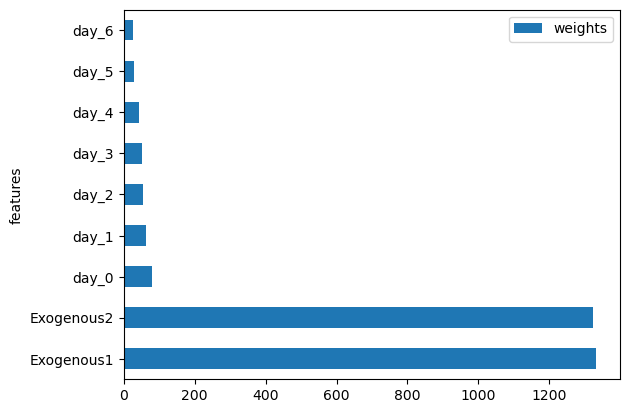

In [ ]:
nixtla_client.weights_x.plot.barh(x='features', y='weights')